In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Calculate the date 1 year ago from today# Calcul 
newest_date = session.query(Measurement.date)\
    .order_by(Measurement.date.desc()).first()
newest_date

('2017-08-23')

In [11]:
# Reduce most recent date of data collected, reduced by 1 year for query for 365 days
new_date = str(newest_date)[2:-3]
one_year_ago = str(eval(new_date[0:4])-1) + new_date[4:]
one_year_ago

'2016-08-23'

In [12]:
inspect_precip_for_twelve_months = session.query(Measurement.date,
                                   func.avg(Measurement.prcp))\
    .filter(Measurement.date > one_year_ago)\
    .group_by(Measurement.date)\
    .order_by(Measurement.date).all()
    
for row in inspect_precip_for_twelve_months:
    print(row)

('2016-08-24', 1.5549999999999997)
('2016-08-25', 0.07714285714285715)
('2016-08-26', 0.016666666666666666)
('2016-08-27', 0.06399999999999999)
('2016-08-28', 0.5166666666666666)
('2016-08-29', 0.24333333333333332)
('2016-08-30', 0.011666666666666667)
('2016-08-31', 0.6359999999999999)
('2016-09-01', 0.006)
('2016-09-02', 0.05)
('2016-09-03', 0.254)
('2016-09-04', 0.276)
('2016-09-05', 0.08499999999999999)
('2016-09-06', 0.246)
('2016-09-07', 0.3333333333333333)
('2016-09-08', 0.07666666666666667)
('2016-09-09', 0.17833333333333332)
('2016-09-10', 0.27999999999999997)
('2016-09-11', 0.25)
('2016-09-12', 0.308)
('2016-09-13', 0.45166666666666666)
('2016-09-14', 2.3800000000000003)
('2016-09-15', 0.8266666666666667)
('2016-09-16', 0.11714285714285715)
('2016-09-17', 0.13599999999999998)
('2016-09-18', 0.10600000000000001)
('2016-09-19', 0.064)
('2016-09-20', 0.14714285714285716)
('2016-09-21', 0.19499999999999998)
('2016-09-22', 0.2057142857142857)
('2016-09-23', 0.22428571428571428)
('2

In [15]:
# Create dataframe by date to create our graph 
preciptation_df = pd.DataFrame(inspect_precip_for_twelve_months, columns=['date','preciptation'])
preciptation_df['date'] = pd.to_datetime(preciptation_df['date'], format='%Y/%m/%d')
preciptation_df.sort_values(by=['date'])
preciptation_df.head()

,date,preciptation
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667


In [16]:
# Reset index to Date and drop dates with no measurements.
# This Dataframe is just for the graph of precipation amounts recorded.  
preciptation_df.set_index('date', inplace=True)
preciptation_df.dropna(inplace=True)
preciptation_df.head()

,preciptation
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


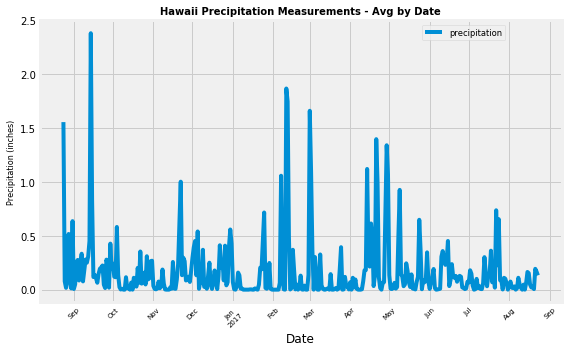

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
preciptation_df.plot(use_index=True, y='preciptation', figsize=(8,5))
#plt.gcf().subplots_adjust(bottom=0.15)
plt.title("Hawaii Precipitation Measurements - Avg by Date", fontweight='bold',size=10)
plt.xlabel(f"Date")
plt.ylabel("Precipitation (inches)", size=8)
plt.xticks(rotation=45, size=7)
plt.legend(["precipitation"],loc=1, fontsize='small', bbox_to_anchor=(.90, 1))
plt.tight_layout()
plt.savefig('precipitation_amounts_date.png')
plt.show()

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
preciptation_df.describe()

,preciptation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [26]:
# Design a query to show how many stations are available in this dataset?
station_list = session.query(Station.id,Station.station,Station.name)
print(f"There are {station_list.count()} stations in the dataset")

There are 9 stations in the dataset


In [28]:
# List the stations and the counts in descending order.
activity = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc())

for row in activity:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
highest_activity_station = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).limit(1).scalar()

highest_activity_station

'USC00519281'

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temperature = session.query(Station.id,
                  Station.name,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
.filter(Measurement.station == Station.station)\
.filter(Measurement.station == "USC00519281")
avg_tmp_rec = "{0:.1f}".format(temperature[0][4])
print(f"Minimum temperature recorded:  {temperature[0][2]}\n\
    Maximum temperture recorded :  {temperature[0][3]}\n    Average temperature recorded:  {avg_tmp_rec}")

Minimum temperature recorded:  54.0
    Maximum temperture recorded :  85.0
    Average temperature recorded:  71.7


In [38]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observation = session.query(Measurement.tobs)\
    .filter(Measurement.date > one_year_ago)\
    .filter(Measurement.station == highest_activity_station)\
    .order_by(Measurement.tobs).all()
    
for row in temperature_observation:
    print(row)

(59.0,)
(59.0,)
(59.0,)
(60.0,)
(60.0,)
(61.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(63.0,)
(63.0,)
(63.0,)
(63.0,)
(64.0,)
(64.0,)
(64.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)


In [39]:
tobs_df = pd.DataFrame(temperature_observation, columns=['temps'])
tobs_df.head()


,temps
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


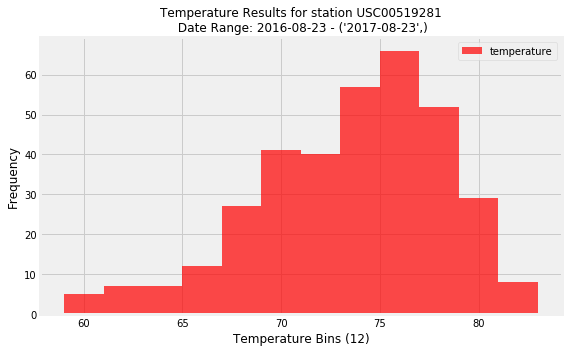

In [45]:
# Plot Temperature Results for Most Active Station

plt.subplots(figsize=(8,5))

plt.hist(tobs_df['temps'], bins=12, color="red", alpha=.7)
plt.title(f"Temperature Results for station {highest_activity_station}\n Date Range: \
{one_year_ago} - {newest_date}",fontsize=12)
plt.xlabel('Temperature Bins (12)', fontsize=12)
plt.ylabel("Frequency", fontsize=12)
labels = ['temperature']
plt.legend(labels)
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.savefig('temperature_results_hist.png')
plt.show()

In [46]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [47]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

arrive = dt.date(2018, 6, 1)
leave = dt.date(2018, 6, 14)
last_year = dt.timedelta(days=365)
temp_avg = (calc_temps((arrive-last_year), (leave-last_year)))
print(temp_avg)


[(72.0, 77.44444444444444, 83.0)]


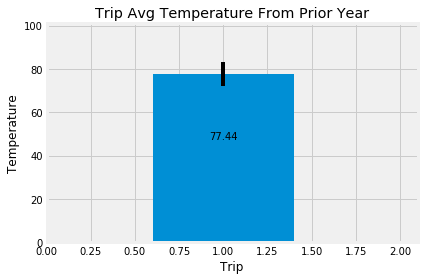

In [55]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

p2p = temp_avg[0][1]-temp_avg[0][2]
avgtemp = temp_avg[0][1]
min_temp = temp_avg[0][0]
max_temp = temp_avg[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgtemp, yerr=p2p)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Trip Avg Temperature From Prior Year")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
    # label the bars 
autolabels(bar_chart)        
plt.ylim(0, 101)
plt.xlim(0,2.1)
fig.tight_layout()
plt.show()


In [56]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rain_fall = session.query(Station.station,
                 func.sum(Measurement.prcp),
                 Station.name,
                 Station.elevation,
                 Station.latitude,
                 Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date)\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())

start_date = "2018-6-1"
end_date = "2018-6-12"

for row in rain_fall:
    rain="{0:.2f}".format(row[1])
    print (f"{row[0]}, {rain}, {row[2]}, {row[3]}, {row[4]}, {row[5]}")
    print()


USC00516128, 1068.09, MANOA LYON ARBO 785.2, HI US, 152.4, 21.3331, -157.8025

USC00519281, 588.64, WAIHEE 837.5, HI US, 32.9, 21.45167, -157.84888999999998

USC00513117, 382.62, KANEOHE 838.1, HI US, 14.6, 21.4234, -157.8015

USC00519523, 295.68, WAIMANALO EXPERIMENTAL FARM, HI US, 19.5, 21.33556, -157.71139

USC00514830, 234.49, KUALOA RANCH HEADQUARTERS 886.9, HI US, 7.0, 21.5213, -157.8374

USC00519397, 131.62, WAIKIKI 717.2, HI US, 3.0, 21.2716, -157.8168

USC00511918, 92.68, HONOLULU OBSERVATORY 702.2, HI US, 0.9, 21.3152, -157.9992

USC00518838, 70.87, UPPER WAHIAWA 874.3, HI US, 306.6, 21.4992, -158.0111

USC00517948, 43.44, PEARL CITY, HI US, 11.9, 21.3934, -157.9751

